# Get started with Amazon Athena for Apache Spark

This notebook will demonstrate the features of Amazon Athena for Apache Spark. We will demonstrate:
<ol>
    <li> Spark DataFrames: reading a public dataset, selecting data and writing to a S3 location </li>
    <li>Spark SQL: creating a new view and selecting data </li>
    <li>Interface with Glue catalog: creating a new database and table, listing databases and tables, selecting data from the tables. </li>
</ol>

## Spark Dataframes
#### Read the Parquet file. The file has headers and we want Spark to infer the schema. 

In [1]:
file_name = "s3://athena-examples-us-east-1/notebooks/yellow_tripdata_2016-01.parquet"

taxi_df = (spark.read.format("parquet")
     .option("header", "true")
     .option("inferSchema", "true")
     .load(file_name))

print("Read parquet file" + " complete")

Calculation started (calculation_id=aec28bb0-ded0-ecef-08a9-383016f6710f) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
Read parquet file complete



#### Use Spark Dataframe to group and count specific column from taxi_df

In [2]:
taxi1_df=taxi_df.groupBy("VendorID", "passenger_count").count()
taxi1_df.show()

Calculation started (calculation_id=f4c28bb0-f1da-08ab-19d6-20433383b076) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+--------+---------------+-------+
|VendorID|passenger_count|  count|
+--------+---------------+-------+
|       1|              0|    302|
|       2|              8|     26|
|       2|              7|     19|
|       2|              0|    217|
|       1|              2| 689189|
|       2|              1|3596032|
|       1|              4|  83816|
|       2|              3| 272172|
|       1|              7|      3|
|       2|              4| 126822|
|       2|              2| 872545|
|       1|              9|     10|
|       2|              6| 367745|
|       1|              3| 164242|
|       2|              5| 598678|
|       2|              9|     13|
|       1|              5|   2360|
|       1|              1|4129474|
|       1|              6|   1402|
+--------+---------------+-------+



#### Pretty print a table

In [3]:
var1 = taxi1_df.collect()
%table var1

Calculation started (calculation_id=5ec28bb1-0766-1201-89a0-0cebd0b4ee07) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


VendorID,count,passenger_count
1,302,0
2,26,8
2,19,7
2,217,0
1,689189,2
2,3596032,1
1,83816,4
2,272172,3
1,3,7
2,126822,4


#### Write data back to S3

In [4]:
taxi1_df.coalesce(1).write.mode('overwrite').csv("s3://096248099977-us-east-1-athena-results-bucket-u1ihabpncc/select_taxi")
print("Write to s3 " + "complete")

Calculation started (calculation_id=8ac28bb1-0cff-cfe3-4029-eecd26264f81) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
Write to s3 complete



---
## Spark SQL
#### Create a new temporary view taxis. Use Spark SQL to select data from this view. Create a taxi dataframe for further processing

In [5]:
taxi_df.createOrReplaceTempView("taxis")

sqlDF = spark.sql("SELECT DOLocationID, sum(total_amount) as sum_total_amount FROM taxis where DOLocationID < 25 GRoup by DOLocationID ORDER BY DOLocationID")
sqlDF.show(50)

Calculation started (calculation_id=84c28bb1-2720-06f1-6a30-7c1b473e7235) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+------------+------------------+
|DOLocationID|  sum_total_amount|
+------------+------------------+
|           1|1453786.2200001795|
|           2|385.19000000000005|
|           3|28310.589999999847|
|           4| 797281.7500003201|
|           5| 5842.680000000003|
|           6|15534.009999999978|
|           7|1226388.8600007575|
|           8| 4943.450000000009|
|           9|25013.719999999867|
|          10| 80311.92000000314|
|          11| 38971.24999999997|
|          12| 99212.20000000625|
|          13|1924162.6000016641|
|          14|416171.31999997684|
|          15| 35907.64999999986|
|          16| 65823.42000000064|
|          17| 530384.0399999009|
|          18|64699.370000000905|
|          19|23878.739999999852|
|          20| 48888.58000000019|
|          21| 71534.48000000088|
|          22|103166.17000000167|
|          23| 17846.57999999998|
|          24|523273.46999984555|
+------------+------------------+



#### Create new database: spark_demo_database

In [6]:
spark.sql("create database if not exists spark_demo_database")
spark.sql("show databases").show()

Calculation started (calculation_id=30c28bb1-40f7-b661-8c1b-ae8bdaeae230) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+-------------------+
|          namespace|
+-------------------+
|            adverts|
|     advertsparquet|
|            default|
|           sampledb|
|spark_demo_database|
+-------------------+



#### Create new table 
Use the spark_demo_database and the taxi1_df dataframe created earlier to cerate a new table: select_taxi_table. The table is also saved to S3
Note: you will need to update IAM to have write permissions to S3://096248099977-us-east-1-athena-results-bucket-u1ihabpncc

In [7]:
spark.sql("use spark_demo_database")
taxi1_df.write.mode("overwrite").format("csv").option("path","s3://096248099977-us-east-1-athena-results-bucket-u1ihabpncc/select_taxi").saveAsTable("select_taxi_table")
print("Create new table" + " complete")

Calculation started (calculation_id=0ac28bb1-4a88-7f3f-dca7-77c564d8cfd9) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
Create new table complete



#### Show the new table in the spark_demo_database
Note: you should be able to go to Glue console and see the new database and table.

In [8]:
spark.sql("show tables").show()

Calculation started (calculation_id=14c28bb1-64e1-6e21-8253-92632056434d) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+-------------------+-----------------+-----------+
|          namespace|        tableName|isTemporary|
+-------------------+-----------------+-----------+
|spark_demo_database|select_taxi_table|      false|
|                   |            taxis|       true|
+-------------------+-----------------+-----------+



#### Read the new table data

In [9]:
spark.sql("select * from select_taxi_table").show()

Calculation started (calculation_id=20c28bb1-72a8-fd92-18a9-c21b4566392c) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
+--------+---------------+-------+
|VendorID|passenger_count|  count|
+--------+---------------+-------+
|       1|              0|    302|
|       2|              8|     26|
|       2|              7|     19|
|       2|              0|    217|
|       1|              2| 689189|
|       2|              1|3596032|
|       1|              4|  83816|
|       2|              3| 272172|
|       1|              7|      3|
|       2|              4| 126822|
|       2|              2| 872545|
|       1|              9|     10|
|       2|              6| 367745|
|       1|              3| 164242|
|       2|              5| 598678|
|       2|              9|     13|
|       1|              5|   2360|
|       1|              1|4129474|
|       1|              6|   1402|
+--------+---------------+-------+



---
## Plot


Calculation started (calculation_id=e4c28bb1-8868-f38d-6d1c-9de0b8363cac) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.


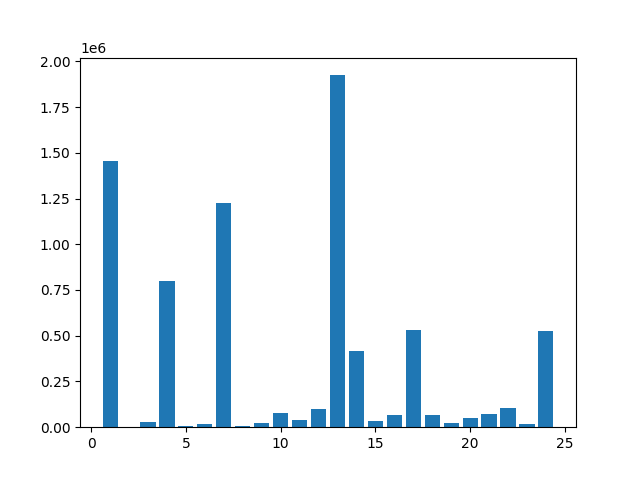

<BarContainer object of 24 artists>



In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.clf()
df=sqlDF.toPandas()
plt.bar(df.DOLocationID, df.sum_total_amount)
%matplot plt

### You have made it to the end of the demo notebook!!

In [11]:
spark.sql("DROP TABLE if exists select_taxi_table")
spark.sql("DROP DATABASE if exists spark_demo_database")
print("Clean resources" + " complete")

Calculation started (calculation_id=b6c28bb1-a264-f53a-e730-6ef993a2fd35) in (session=bec28baf-0d1b-0e1f-8962-5f0271b880fa). Checking calculation status...


Progress:   0%|          |elapsed time = 00:00s

Calculation completed.
Clean resources complete

